# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df_gc = pd.read_excel('D:/SLC/mini project/GermanCredit.xlsx')
df_gc

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12
...,...,...,...
995,0,1987,24
996,0,2303,24
997,0,12680,21
998,0,6468,12


# 2. Check how many records do we have


In [3]:
df_gc.shape

(1000, 3)

In [4]:
df_gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [5]:
df_gc.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

# 3. Plot Histogram for column 'CreditAmount'

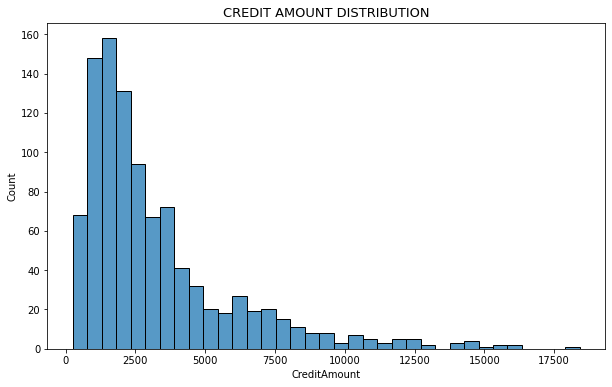

In [6]:
plt.figure(figsize = (10,6))
sns.histplot(df_gc['CreditAmount'])
plt.title('CREDIT AMOUNT DISTRIBUTION', fontsize = 13)
plt.show()

In [7]:
df_gc.skew()

Creditability              -0.874183
CreditAmount                1.949594
DurationOfCreditInMonths    1.094184
dtype: float64

In [8]:
df_gc['CreditAmount'] = np.log(df_gc['CreditAmount'])

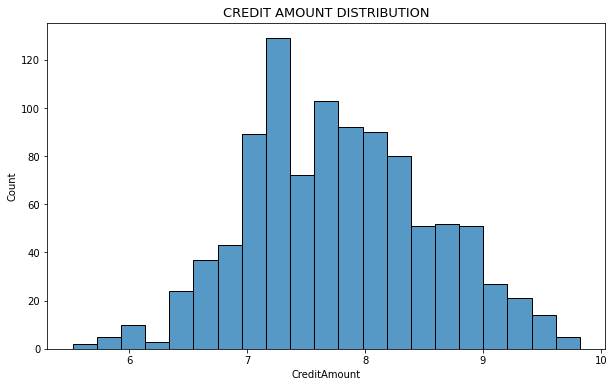

In [9]:
plt.figure(figsize = (10,6))
sns.histplot(df_gc['CreditAmount'])
plt.title('CREDIT AMOUNT DISTRIBUTION', fontsize = 13)
plt.show()

In [10]:
df_gc.skew()

Creditability              -0.874183
CreditAmount                0.129134
DurationOfCreditInMonths    1.094184
dtype: float64

# 3b. Create creditability dataframe

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [11]:
# print('Credibility0 and credibility1 count in training data :', dict(y_train.value_counts()))
# print('Credibility0 and credibility1 count in test data :', dict(y_test.value_counts()))

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

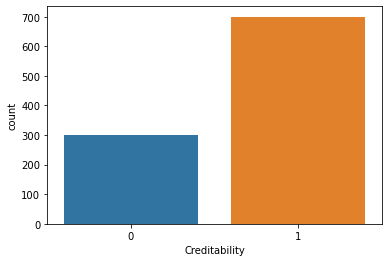

In [12]:
sns.countplot(df_gc['Creditability'])
plt.show()

# 6. Prepare input data for the model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
import statsmodels
import statsmodels.api as sm

In [15]:
X = df_gc.iloc[:,[1,2]]
X = sm.add_constant(X)
y = df_gc['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

# 7. Fit logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = sm.Logit(y,X).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.587884
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                 0.03762
Time:                        19:06:29   Log-Likelihood:                -587.88
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.046e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7007      0.845      0.830      0.407      -0.955       2.356
CreditAmount                 0.1396      0.121      1.158      0.247      -0.097       0.376
DurationOfCreditInMonths    -0.0433      0.008     -5.680      0.000      -0.058      -0.028
============================================================================================
"""

# 8. Test accuracy calculation

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)
dtf.score(X_train, y_train)

1.0

In [21]:
dtf.score(X_test, y_test)

0.62

# 9. Build a confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred = dtf.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 24,  32],
       [ 44, 100]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [28]:
y_pred_def = y_pred[y_pred == 1]
y_pred_ndef = y_pred[y_pred == 0]